## 1. Datos (10 puntos)

Considere los siguientes datos de bonos, índice de acciones, mercados desarrollados, mercados emergentes, fondos privados, activos reales y activos libres de riesgo:

In [1]:
# Importamos pandas y numpy
import pandas as pd
import numpy as np

In [2]:
# Resumen en base anual de rendimientos esperados y volatilidades
annual_ret_summ = pd.DataFrame(columns=['Bonos', 'Acciones', 'Desarrollado', 'Emergente', 'Privados', 'Real', 'Libre_riesgo'], index=['Media', 'Volatilidad'])
annual_ret_summ.loc['Media'] = np.array([0.0400, 0.1060, 0.0830, 0.1190, 0.1280, 0.0620, 0.0300])
annual_ret_summ.loc['Volatilidad'] = np.array([0.0680, 0.2240, 0.2210, 0.3000, 0.2310, 0.0680, None])

annual_ret_summ.round(4)

,Bonos,Acciones,Desarrollado,Emergente,Privados,Real,Libre_riesgo
Media,0.04,0.106,0.083,0.119,0.128,0.062,0.03
Volatilidad,0.068,0.224,0.221,0.3,0.231,0.068,None


""


In [6]:
# Matriz de correlación
corr = pd.DataFrame(data= np.array([[1.0000, 0.4000, 0.2500, 0.2000, 0.1500, 0.2000],
                                    [0.4000, 1.0000, 0.7000, 0.6000, 0.7000, 0.2000],
                                    [0.2500, 0.7000, 1.0000, 0.7500, 0.6000, 0.1000],
                                    [0.2000, 0.6000, 0.7500, 1.0000, 0.2500, 0.1500],
                                    [0.1500, 0.7000, 0.6000, 0.2500, 1.0000, 0.3000],
                                    [0.2000, 0.2000, 0.1000, 0.1500, 0.3000, 1.0000]]),
                    columns=annual_ret_summ.columns[:-1], index=annual_ret_summ.columns[:-1])
corr.round(4)

,Bonos,Acciones,Desarrollado,Emergente,Privados,Real
Bonos,1.00,0.4,0.25,0.20,0.15,0.20
Acciones,0.40,1.0,0.70,0.60,0.70,0.20
Desarrollado,0.25,0.7,1.00,0.75,0.60,0.10
Emergente,0.20,0.6,0.75,1.00,0.25,0.15
Privados,0.15,0.7,0.60,0.25,1.00,0.30
Real,0.20,0.2,0.10,0.15,0.30,1.00


# **1. Graficar en el espacio de rendimiento esperado contra volatilidad cada uno de los activos (10 puntos).**

In [8]:
sp = annual_ret_summ.loc['Volatilidad'].values
Er = annual_ret_summ.loc['Media'].values

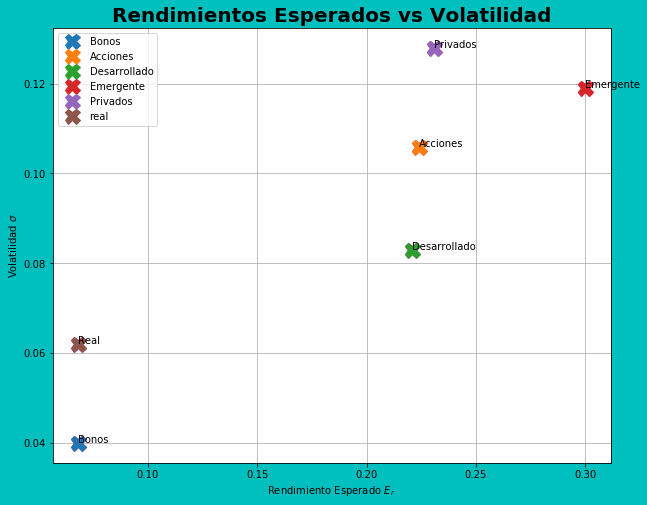

In [12]:
import matplotlib.pyplot as plt

x = sp
y = Er

plt.figure(figsize=(10,8),facecolor='c')
plt.plot(x,y,'X', color = 'deeppink',ms=15)
plt.title('Rendimientos Esperados vs Volatilidad',fontsize=20, fontweight='bold')
plt.xlabel('Rendimiento Esperado $E_r$')
plt.ylabel('Volatilidad $\sigma$')

plt.plot(annual_ret_summ.loc['Volatilidad']['Bonos'],annual_ret_summ.loc['Media']['Bonos'],'X',ms=15,label='Bonos')
plt.plot(annual_ret_summ.loc['Volatilidad']['Acciones'],annual_ret_summ.loc['Media']['Acciones'],'X',ms=15,label='Acciones')
plt.plot(annual_ret_summ.loc['Volatilidad']['Desarrollado'],annual_ret_summ.loc['Media']['Desarrollado'],'X',ms=15,label='Desarrollado')
plt.plot(annual_ret_summ.loc['Volatilidad']['Emergente'],annual_ret_summ.loc['Media']['Emergente'],'X',ms=15,label='Emergente')
plt.plot(annual_ret_summ.loc['Volatilidad']['Privados'],annual_ret_summ.loc['Media']['Privados'],'X',ms=15,label='Privados')
plt.plot(annual_ret_summ.loc['Volatilidad']['Real'],annual_ret_summ.loc['Media']['Real'],'X',ms=15,label='real')

plt.text(x[0],y[0],annual_ret_summ.columns[0])
plt.text(x[1],y[1],annual_ret_summ.columns[1])
plt.text(x[2],y[2],annual_ret_summ.columns[2])
plt.text(x[3],y[3],annual_ret_summ.columns[3])
plt.text(x[4],y[4],annual_ret_summ.columns[4])
plt.text(x[5],y[5],annual_ret_summ.columns[5])

plt.legend(loc='best')
plt.grid()
plt.show()

## 2. Hallando portafolios sobre la frontera de mínima varianza (35 puntos)

Usando los datos del punto anterior:

1. Halle los pesos del portafolio de mínima varianza considerando todos los activos riesgosos. También reportar claramente el rendimiento esperado, volatilidad y cociente de Sharpe para dicho portafolio (15 puntos).
2. Halle los pesos del portafolio EMV considerando todos los activos riesgosos. También reportar claramente el rendimiento esperado, volatilidad y cociente de Sharpe para dicho portafolio (15 puntos).
3. Halle la covarianza y la correlación entre los dos portafolios hallados (5 puntos)

# **1. Halle los pesos del portafolio de mínima varianza considerando todos los activos riesgosos. También reportar claramente el rendimiento esperado, volatilidad y cociente de Sharpe para dicho portafolio (15 puntos).**

In [13]:
annual_ret_summ = annual_ret_summ.drop('Libre_riesgo', 1)

In [14]:
from scipy.optimize import minimize

In [15]:
D = np.diag(annual_ret_summ.loc['Volatilidad'])
Sigma = D.dot(corr).dot(D)
Eind = np.array(annual_ret_summ.loc['Media'])
rf = 0.03

In [16]:
# Función objetivo
def varianza(w, Sigma):
    return w.dot(Sigma).dot(w)

In [17]:
# Dato inicial
w0 = np.ones((6,))/6
# Cotas de las variables
bnds = ((0,1),)*6
# Restricciones
cons = ({'type': 'eq', 'fun': lambda w: np.sum(w)-1},)

In [18]:
# Portafolio de mínima varianza
minvar = minimize(varianza, w0, args = (Sigma,), 
                  bounds=bnds, constraints=cons)
minvar

     fun: 0.0027745037325952863
     jac: array([ 0.00551408,  0.00912289,  0.00525779,  0.00714968,  0.00710235,
        0.0055834 ])
 message: 'Optimization terminated successfully.'
    nfev: 64
     nit: 8
    njev: 8
  status: 0
 success: True
       x: array([  4.95146500e-01,   0.00000000e+00,   2.09837058e-04,
         4.33680869e-19,   0.00000000e+00,   5.04643663e-01])

In [19]:
w_minvar = minvar.x
Er_minvar = Eind.dot(w_minvar)
s_minvar = np.sqrt(varianza(w_minvar, Sigma))
sharpe_minvar = (Er_minvar-rf)/s_minvar

In [20]:
#Pesos del portafolio de mínima varianza
w_minvar

array([  4.95146500e-01,   0.00000000e+00,   2.09837058e-04,
         4.33680869e-19,   0.00000000e+00,   5.04643663e-01])

In [21]:
#Rendimiento del portafolio de mínima varianza
Er_minvar

0.0511111835712562

In [22]:
#Riesgo del portafolio de mínima varianza
s_minvar

0.052673558191898201

In [23]:
#Radio de Sharpe de mínima varianza
sharpe_minvar

0.40079281324312249

# **2. Halle los pesos del portafolio EMV considerando todos los activos riesgosos. También reportar claramente el rendimiento esperado, volatilidad y cociente de Sharpe para dicho portafolio (15 puntos).**

In [24]:
# Función objetivo
def m_sharpe_r(w, Sigma, rf, Eind):
    Erp = Eind.dot(w)
    varp= w.dot(Sigma).dot(w)
    return -(Erp-rf)/np.sqrt(varp)

In [25]:
# Dato inicial
w0 = np.ones((6,))/6
# Cotas de las variables
bnds = ((0,1),)*6
# Restricciones
cons = ({'type': 'eq', 'fun': lambda w: np.sum(w)-1},)

In [26]:
# Portafolio EMV
EMV = minimize(m_sharpe_r, w0, args=(Sigma, rf, Eind),
              bounds = bnds, constraints = cons)

In [27]:
## Pesos, rendimiento riesgo y cociente de sharpe del portafolio EMV
w_EMV = EMV.x
Er_EMV = Eind.dot(w_EMV)
s_EMV = np.sqrt(w_EMV.dot(Sigma).dot(w_EMV))
sharpe_EMV = (Er_EMV-rf)/s_EMV

In [28]:
#Pesos del portafolio EMV
w_EMV

array([  1.34289953e-17,   1.01738175e-16,   1.23637069e-16,
         8.19187951e-02,   1.65859031e-01,   7.52222174e-01])

In [29]:
#Rendimiento del portafolio EMV
Er_EMV

0.0776160673678556

In [30]:
#Riesgo del portafolio EMV
s_EMV

0.081927357909861095

In [31]:
#Cociente de Sharpe
sharpe_EMV

0.58119862012692036

# **3. Halle la covarianza y la correlación entre los dos portafolios hallados (5 puntos)**

In [32]:
# Covarianza entre los portafolios
cov = w_minvar.dot(Sigma).dot(w_EMV)
cov

0.0029818190366882494

In [33]:
# Correlación entre los portafolios
corr = cov/(s_minvar*s_EMV)
corr

0.69097077162616571

## 3. Frontera de mínima varianza y LAC (30 puntos)

Con los portafolios que se encontraron en el punto anterior (de mínima varianza y EMV):

1. Construya la frontera de mínima varianza calculando el rendimiento esperado y volatilidad para varias combinaciones de los anteriores portafolios. Reportar dichas combinaciones en un DataFrame incluyendo pesos, rendimiento, volatilidad y cociente de Sharpe (15 puntos).
2. También construya la línea de asignación de capital entre el activo libre de riesgo y el portafolio EMV. Reportar las combinaciones de estos activos en un DataFrame incluyendo pesos, rendimiento, volatilidad y cociente de Sharpe (15 puntos).

# **1. Construya la frontera de mínima varianza calculando el rendimiento esperado y volatilidad para varias combinaciones de los anteriores portafolios. Reportar dichas combinaciones en un DataFrame incluyendo pesos, rendimiento, volatilidad y cociente de Sharpe (15 puntos).**

In [34]:
# Vector de w
w = np.linspace(-2, 4, 100)

In [35]:
frontera = pd.DataFrame(columns=['w_EMV', 'w_minvar', '$E_r$', '$\sigma$', 'Sharpe'])
frontera['w_EMV'] = w
frontera['w_minvar'] = 1-w
frontera['$E_r$'] = w*Er_EMV+(1-w)*Er_minvar
frontera['$\sigma$']= np.sqrt((w*s_EMV)**2+((1-w)*s_minvar)**2+2*w*(1-w)*cov)
frontera['Sharpe'] = (frontera['$E_r$']-rf)/frontera['$\sigma$']
frontera

,w_EMV,w_minvar,$E_r$,$\sigma$,Sharpe
0,-2.000000,3.000000,-0.001899,0.126638,-0.251889
1,-1.939394,2.939394,-0.000292,0.123374,-0.245532
2,-1.878788,2.878788,0.001314,0.120129,-0.238792
3,-1.818182,2.818182,0.002920,0.116905,-0.231637
4,-1.757576,2.757576,0.004527,0.113703,-0.224032
5,-1.696970,2.696970,0.006133,0.110526,-0.215939
6,-1.636364,2.636364,0.007740,0.107375,-0.207315
7,-1.575758,2.575758,0.009346,0.104253,-0.198115
8,-1.515152,2.515152,0.010952,0.101163,-0.188288
9,-1.454545,2.454545,0.012559,0.098107,-0.177780


# **2. También construya la línea de asignación de capital entre el activo libre de riesgo y el portafolio EMV. Reportar las combinaciones de estos activos en un DataFrame incluyendo pesos, rendimiento, volatilidad y cociente de Sharpe (15 puntos).**

In [36]:
n = 501
wp = np.linspace(0, 5, n)

LAC = pd.DataFrame(index=np.arange(n), columns=['wp','wrf','$E_r$','$\sigma$','Sharpe'])
LAC['wp'] = wp
LAC['wrf'] = 1-wp
LAC['$E_r$']= wp*Er_EMV+(1-wp)*rf
LAC['$\sigma$']= wp*s_EMV
LAC['Sharpe'] = (LAC['$E_r$']-rf)/LAC['$\sigma$']

LAC

,wp,wrf,$E_r$,$\sigma$,Sharpe
0,0.00,1.00,0.030000,0.000000,NaN
1,0.01,0.99,0.030476,0.000819,0.581199
2,0.02,0.98,0.030952,0.001639,0.581199
3,0.03,0.97,0.031428,0.002458,0.581199
4,0.04,0.96,0.031905,0.003277,0.581199
5,0.05,0.95,0.032381,0.004096,0.581199
6,0.06,0.94,0.032857,0.004916,0.581199
7,0.07,0.93,0.033333,0.005735,0.581199
8,0.08,0.92,0.033809,0.006554,0.581199
9,0.09,0.91,0.034285,0.007373,0.581199


## 4. Gráficos y conclusiones (25 puntos)

1. Usando todos los datos obtenidos, grafique:
 - los activos individuales,
 - portafolio de mínima varianza,
 - portafolio eficiente en media-varianza (EMV),
 - frontera de mínima varianza, y
 - línea de asignación de capital,
en el espacio de rendimiento (eje $y$) vs. volatilidad (eje $x$). Asegúrese de etiquetar todo y poner distintos colores para diferenciar los distintos elementos en su gráfico (15 puntos).
2. Suponga que usted está aconsejando a un cliente cuyo coeficiente de aversión al riesgo resultó ser 4. ¿Qué asignación de capital le sugeriría?, ¿qué significa su resultado?(10 puntos)

# **1. Usando todos los datos obtenidos, grafique:**
 - los activos individuales,
 - portafolio de mínima varianza,
 - portafolio eficiente en media-varianza (EMV),
 - frontera de mínima varianza, y
 - línea de asignación de capital,
- en el espacio de rendimiento (eje $y$) vs. volatilidad (eje $x$). Asegúrese de etiquetar todo y poner distintos colores para diferenciar los distintos elementos en su gráfico (15 puntos).

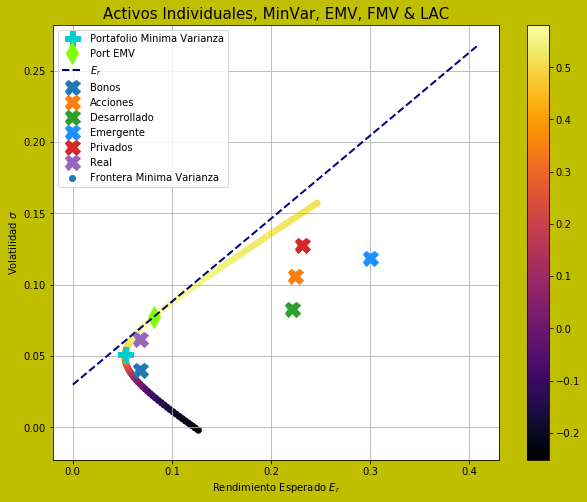

In [40]:
x = sp
y = Er

plt.figure(figsize=(10,8),facecolor='y')
plt.title('Activos Individuales, MinVar, EMV, FMV & LAC',size = 15)
plt.scatter(frontera['$\sigma$'],frontera['$E_r$'],c=frontera['Sharpe'],cmap='inferno',label='Frontera Minima Varianza')
#plt.plot(x,y,'X', color = 'blueviolet',ms=15)
plt.plot(s_minvar,Er_minvar,'P',label='Portafolio Minima Varianza',ms=15,color='darkturquoise')
plt.plot(s_EMV,Er_EMV,'d',label='Port EMV',ms=15,color='chartreuse')
plt.plot(LAC['$\sigma$'],LAC['$E_r$'],'--',lw=2,color='navy')
plt.xlabel('Rendimiento Esperado $E_r$')
plt.ylabel('Volatilidad $\sigma$')

plt.plot(annual_ret_summ.loc['Volatilidad']['Bonos'],annual_ret_summ.loc['Media']['Bonos'],'X',ms=15,label='Bonos')
plt.plot(annual_ret_summ.loc['Volatilidad']['Acciones'],annual_ret_summ.loc['Media']['Acciones'],'X',ms=15,label='Acciones')
plt.plot(annual_ret_summ.loc['Volatilidad']['Desarrollado'],annual_ret_summ.loc['Media']['Desarrollado'],'X',ms=15,label='Desarrollado')
plt.plot(annual_ret_summ.loc['Volatilidad']['Emergente'],annual_ret_summ.loc['Media']['Emergente'],'X',ms=15,label='Emergente',color='dodgerblue')
plt.plot(annual_ret_summ.loc['Volatilidad']['Privados'],annual_ret_summ.loc['Media']['Privados'],'X',ms=15,label='Privados')
plt.plot(annual_ret_summ.loc['Volatilidad']['Real'],annual_ret_summ.loc['Media']['Real'],'X',ms=15,label='Real')

plt.legend(loc='best')
plt.colorbar()
plt.grid()
plt.show()

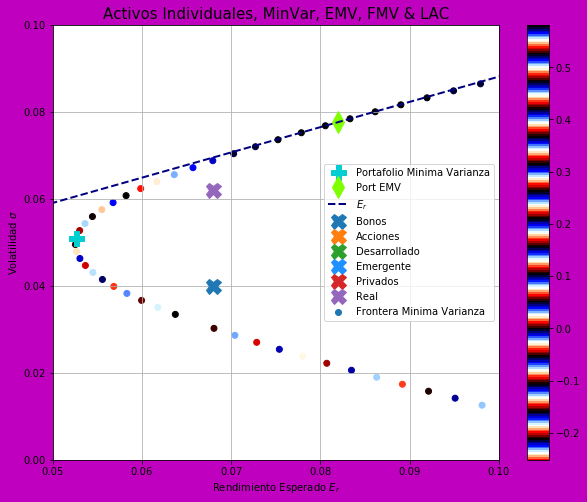

In [41]:
x = sp
y = Er

plt.figure(figsize=(10,8),facecolor='m')
plt.title('Activos Individuales, MinVar, EMV, FMV & LAC',size = 15)
plt.scatter(frontera['$\sigma$'],frontera['$E_r$'],c=frontera['Sharpe'],cmap='flag',label='Frontera Minima Varianza')
#plt.plot(x,y,'X', color = 'blueviolet',ms=15)
plt.plot(s_minvar,Er_minvar,'P',label='Portafolio Minima Varianza',ms=15,color='darkturquoise')
plt.plot(s_EMV,Er_EMV,'d',label='Port EMV',ms=15,color='chartreuse')
plt.plot(LAC['$\sigma$'],LAC['$E_r$'],'--',lw=2,color='navy')
plt.xlabel('Rendimiento Esperado $E_r$')
plt.ylabel('Volatilidad $\sigma$')

plt.plot(annual_ret_summ.loc['Volatilidad']['Bonos'],annual_ret_summ.loc['Media']['Bonos'],'X',ms=15,label='Bonos')
plt.plot(annual_ret_summ.loc['Volatilidad']['Acciones'],annual_ret_summ.loc['Media']['Acciones'],'X',ms=15,label='Acciones')
plt.plot(annual_ret_summ.loc['Volatilidad']['Desarrollado'],annual_ret_summ.loc['Media']['Desarrollado'],'X',ms=15,label='Desarrollado')
plt.plot(annual_ret_summ.loc['Volatilidad']['Emergente'],annual_ret_summ.loc['Media']['Emergente'],'X',ms=15,label='Emergente',color='dodgerblue')
plt.plot(annual_ret_summ.loc['Volatilidad']['Privados'],annual_ret_summ.loc['Media']['Privados'],'X',ms=15,label='Privados')
plt.plot(annual_ret_summ.loc['Volatilidad']['Real'],annual_ret_summ.loc['Media']['Real'],'X',ms=15,label='Real')

plt.legend(loc='best')
plt.xlim([0.05,0.1])
plt.ylim([0,0.1])
plt.colorbar()
plt.grid()
plt.show()

# **2. Suponga que usted está aconsejando a un cliente cuyo coeficiente de aversión al riesgo resultó ser 4. ¿Qué asignación de capital le sugeriría?, ¿qué significa su resultado?(10 puntos**

In [42]:
woptima = (Er_EMV-rf)/(4*s_EMV**2)
woptima

1.7735181353168143

In [3]:
print('Yo le sugeriría a este cliente que invirtiera todo su capital en el portafolio eficiente de media varianza o EMV (Rombo verde en la gráfica) y respecto al segundo portafolio, le sugeriría que prestara su capital a la tasa libre de riesgo ')

Yo le sugeriría a este cliente que invirtiera todo su capital en el portafolio eficiente de media varianza o EMV (Rombo verde en la gráfica) y respecto al segundo portafolio, le sugeriría que prestara su capital a la tasa libre de riesgo 


<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>

In [44]:
from IPython.display import display, HTML
display(HTML(""" <style> .output {display: flex; align-items: center; text-align: center; } </style> """))

In [45]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))